# Tarea 3 Redes Complejas
Integrantes:


*   Jorge Díaz
*   Sebastián Godínez 



In [ ]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pregunta 1

Referencia: https://zhiyzuo.github.io/python-modularity-maximization/

In [ ]:
pip install python-modularity-maximization==0.0.1rc4 --quiet

In [167]:
# create ER network
A = nx.erdos_renyi_graph(200, .2, seed=123, directed=False)

In [168]:
print(nx.info(A))
# nx.draw(A)
# plt.show()

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 4021
Average degree:  40.2100


In [169]:
B1_range = list(range(0, 100))
B2_range = list(range(100, 200))

C1_range = list(range(0, 50)) + list(range(100, 150))
C2_range = list(range(50, 100)) + list(range(150, 200))

In [181]:
from modularity_maximization import partition
from modularity_maximization.utils import get_modularity

def add_by_p(H:nx.Graph, u:int, v:int, p:float) -> None:
  import random
  if random.uniform(0, 1) < p:
    H.add_edge(u, v)
  else:
    H.add_edge(v, u)

def create_partition(G: nx.Graph, range1:list, range2:list, p:float = None) -> nx.DiGraph:
  H = nx.DiGraph()
  for u, v in G.edges():
    if p is not None and (u in range1 and v in range2):
      add_by_p(H, u, v, p)
    elif p is not None and (v in range1 and u in range2):
      add_by_p(H, v, u, 1.0 - p)
    else:
      # other case add a edge is flip a coin
      add_by_p(H, u, v, 0.5)
  return H

def create_with_modularity(G: nx.Graph, range1:list, range2:list, p:float = None) -> float:
  H = create_partition(G, range1, range2, p)
  return get_modularity(H, partition(H, refine=False))

def create_mean(G: nx.Graph, range1:list, range2:list, p:float = None) -> float:
  return np.mean([create_with_modularity(A, range1, range2, p) for i in range(50)])

Antes de comenzar con la modularidad se espera que en los extremos, es decir las probabilidades $p=0$ y $p=1$ obtengamos los valores más alto de modularidad, ya que, es donde se distingue de mejor manera distintas comunidades porque la dirección de los arcos se carga para un lado. Por lo mismo entre más cercano sea el valor de p a $0.5$, observaremos valores más similares a los obtenidos en la modularidad de C. Primero porque se trata de la misma probabilidad para agregar nodos, por lo que se trata de un comportamiento similar a pesar de que se traten de conjuntos distintos. Y segundo es que con la probabilidad de $p=0.5$, es más dificil distinguir para el algoritmo, ya que, teoricamente podemos tener la misma cantidad de nodos para una dirección y para otra lo que hace parecer que estamos ante una unica comunidad.

In [182]:
p_range = np.arange(0, 1.1, .1)
B_values = [create_mean(A, B1_range, B2_range, p) for p in p_range]
C_values = create_mean(A, C1_range, C2_range)

Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directed graph
Calculating modularity for directe

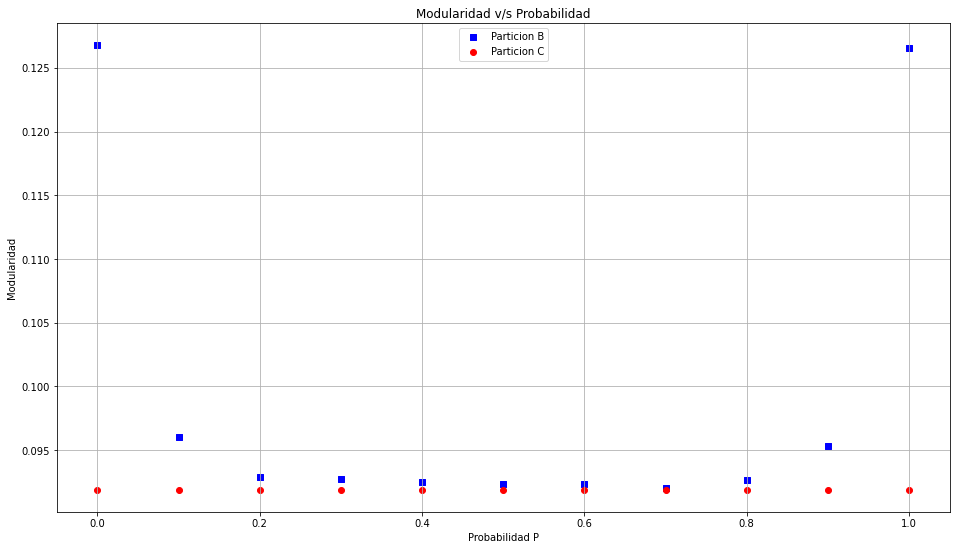

In [186]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.scatter(p_range, B_values, c='b', marker="s", label='Particion B')
ax.scatter(p_range, np.repeat(C_values, 11), c='r', marker="o", label='Particion C')
ax.set(xlabel='Probabilidad P', ylabel='Modularidad',
       title='Modularidad v/s Probabilidad')
ax.grid()
plt.legend(loc='upper center');
plt.show()

Si bien probablemente es necesario correr el algoritmo más veces para reducir el ruido, se aprecia como en los extremos el algorimot reconocio los dos grupos esperados y a medida que se acerca a 0.5 se aprecia un valor similar a de los grupos C. Esto es esperable ya que literalmente la red se construye de la misma manera. Finalmente dada la forma en que se construyo la red es que se puede explicar el bajo valor de la red C, dado que los nodos exteriores tienen la misma logica de construcción que los nodos interiores del grupo, el algoritmo no supo reconocer la existencia de algun tipo de grupo.

# Pregunta 2

In [ ]:
pescado = nx.read_pajek('/content/drive/MyDrive/Semestres/Semestre 2021-1/Redes Complejas/Tarea 3/pescado.net')

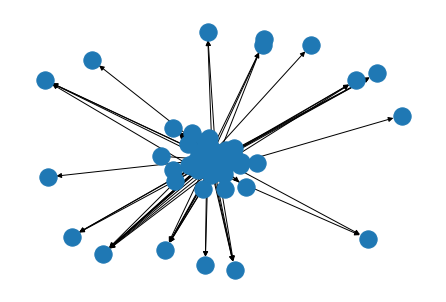

In [ ]:
nx.draw(pescado)
plt.show()

## A

In [ ]:
import itertools
import functools
arr = list(itertools.combinations(range(1,100), 2))

m = pescado.number_of_edges()
n = pescado.number_of_nodes()

def a_i_j(G:nx.MultiDiGraph, i:str, j:str) -> int:
  return int(G.has_edge(i, j))

def sum_p_1(G:nx.MultiDiGraph, a_i_j) -> int:
  return functools.reduce(
      lambda result, nodes: result + (a_i_j(G, nodes[0], nodes[1]) * a_i_j(G, nodes[1], nodes[0])),
      itertools.combinations(pescado.nodes(), 2),
      0
    )

def sum_a_mean(G:nx.MultiDiGraph, a_i_j) -> int:
  return functools.reduce(
      lambda result, nodes: result + a_i_j(G, nodes[0], nodes[1]),
      itertools.combinations(pescado.nodes(), 2),
      0
    ) 

a_mean = sum_a_mean(pescado, a_i_j) / (n*(n-1))

p_1 = sum_p_1(pescado, a_i_j) / m

p = (p_1 - a_mean) / (1 - a_mean)
print(p)

0.19256957100316688


De la formula vista en clases obtenemos que la reciprocidad es de un valor de $p=0.192$, dado que es un valor positivo se dice que es reciproca, sin embargo, dado la cercania a 0 se podria decir que no es ninguna de los dos casos.

## B

Para esto $a_{ij} = peso(i,j)$ y no utilizaremos la modificación, sino que la expresión completa para poder obtener un valor normalizado y comparable al anterior.

In [ ]:
def a_i_j(G:nx.MultiDiGraph, i:str, j:str) -> float:
  if G.has_edge(i, j): return G[i][j][0]['weight']
  return 0.0

def a_i_j_mean(G:nx.MultiDiGraph, nodes:tuple, a_mean:float) -> float:
  return a_i_j(G, nodes[0], nodes[1]) - a_mean

def a_j_i_mean(G:nx.MultiDiGraph, nodes:tuple, a_mean:float) -> float:
  return a_i_j(G, nodes[1], nodes[0]) - a_mean

def sum_upper(G:nx.MultiDiGraph, a_i_j, a_mean:float) -> int:
  return functools.reduce(
      lambda result, nodes: result + (a_i_j_mean(G, nodes, a_mean) * a_j_i_mean(G, nodes, a_mean)),
      itertools.combinations(G.nodes(), 2),
      0
    )
  
def sum_down(G:nx.MultiDiGraph, a_i_j, a_mean:float) -> int:
  return functools.reduce(
      lambda result, nodes: result + a_i_j_mean(G, nodes, a_mean),
      itertools.combinations(pescado.nodes(), 2),
      0
    )

a_mean = sum_a_mean(pescado, a_i_j) / (n*(n-1))

p = sum_upper(pescado, a_i_j, a_mean) / sum_down(pescado, a_i_j, a_mean)**2
print(p)

0.03471804432017973


De esta manera obtenemos que $p=0.0347$, es decir, con la modificación obtenemos que la red no se define como recíproca o antirrecíproca. Es interesante este resultado porque se esperaba que al definir pesos sobre los arcos fuera más facil para el calculo determinar si la red es recíproca o antirrecíproca. En ambos resultado es interesante observar que el calculo se incluna sobre que la red es del tipo reciproca, esto lo menciono porque al ser una red de exportación de materia prima uno esperaria que los paises que exportan pescado no importen de otros paises, lo que inclinaria nuestra red a una de tipo antirrecíproca, sin embargo este resultado nos muestra que en paises que exportan pescado tambien esta la probabilidad de que importen.

## C

In [157]:
import functools
 
def a_i_j(G:nx.MultiDiGraph, i:str, j:str) -> float:
  if G.has_edge(i, j): return pescado[i][j][0]['weight']
  return 0.0

def a_j_i(G:nx.MultiDiGraph, i:str, j:str) -> float:
  if G.has_edge(j, i): return pescado[j][i][0]['weight']
  return 0.0

def P(G:nx.MultiDiGraph, i:str, a_i_j) -> float:
  return functools.reduce(
      lambda result, node: result + a_i_j(G, i, node),
      pescado.nodes(),
      0
  )

p_out = [P(pescado, node, a_i_j) for node in pescado.nodes() if P(pescado, node, a_i_j) != 0]
p_in = [P(pescado, node, a_j_i) for node in pescado.nodes() if P(pescado, node, a_j_i) != 0]

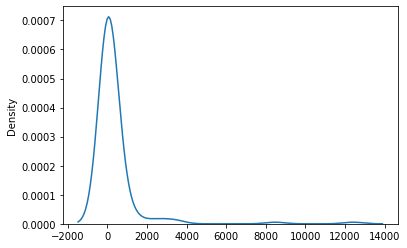

In [158]:
sns.kdeplot(x=p_in)

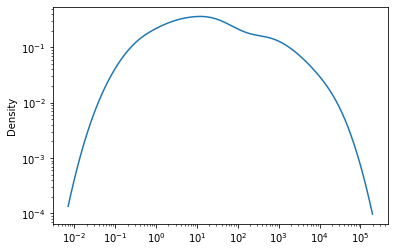

In [160]:
sns.kdeplot(x=p_in, log_scale=(True, True))

Para el caso de $S_{in}$ podemos apreciar que sigue una ley de potencias. Esto puede explicar el comportamiento de que la red no necesariamente es antirreciproca, porque nos dice que muchos paises importan poco pescado, esto puede incluir a paises que exportan pescado.

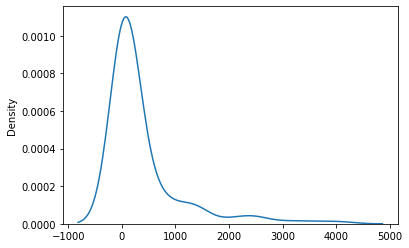

In [154]:
sns.kdeplot(x=p_out)

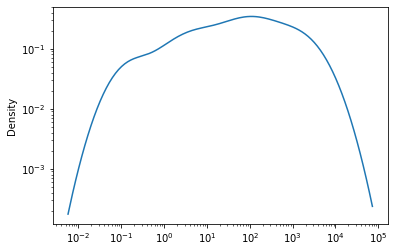

In [156]:
sns.kdeplot(x=p_out, log_scale=(True, True))

Para el caso de $S_{out}$ es dificil apreciar si sigue una distribución conocida. Si consideraramos los datos superiores a 100 podriamos apreciar que tiende a seguir una ley de potencia. Lo cual tendria más sentido que decir que desde 0 sigue una ley de potencia, porque no olvidemos que se trata en este caso de exportaciones y seria raro que muchos paises exporten pocas unidades que tiendan a 0.

## D

No handles with labels found to put in legend.


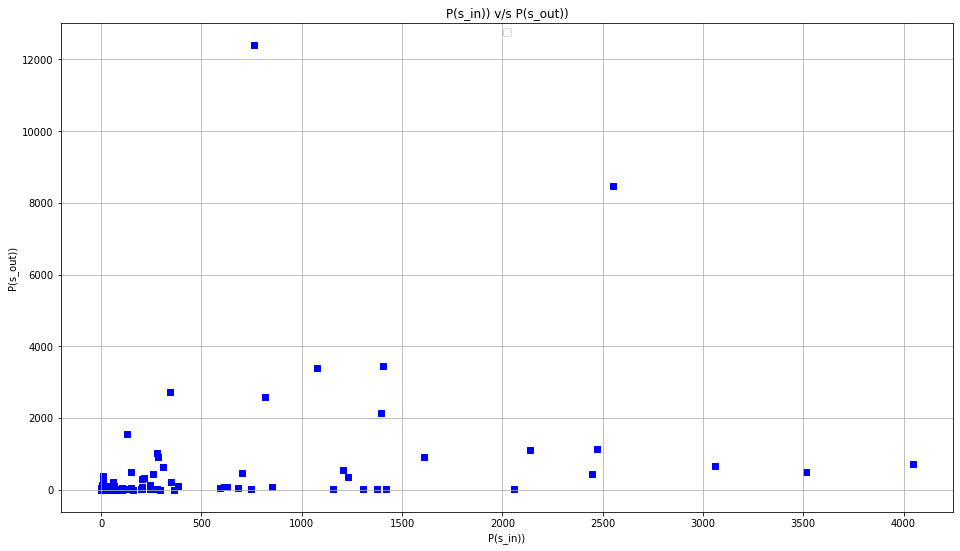

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.scatter(p_in, p_out, c='b', marker="s")
ax.set(xlabel='P(s_in))', ylabel='P(s_out))',
       title='P(s_in)) v/s P(s_out))')
ax.grid()
plt.legend(loc='upper center');
plt.show()

No handles with labels found to put in legend.


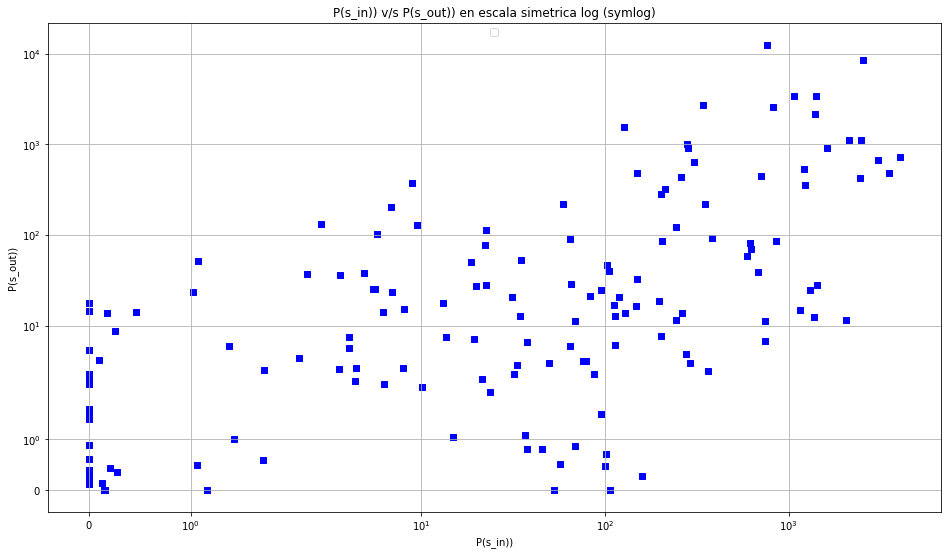

In [ ]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
ax.scatter(p_in, p_out, c='b', marker="s")
ax.set(
    xlabel='P(s_in))',
    ylabel='P(s_out))',
    title='P(s_in)) v/s P(s_out)) en escala simetrica log (symlog)',
    xscale='symlog',
    yscale='symlog'
    )
ax.grid()
plt.legend(loc='upper center');
plt.show()

De lo que se puede observar del grafico, no se puede inferir algun tipo de relación entre estas dos variables. 

Si escalamos los datos a _symlog_ se observa ligeramente la relación esperada menciona en el apartado __B__ se observa como muchos datos que tienen $s_{out}  != 0$ tienen un valor de $S_{in}$ igual a 0 y viceversa, lo cual tiene sentido si se trata de exportación de bienes esenciales.

## E

In [ ]:
def add_new_weight(G: nx.DiGraph, i:str, j:str, H:nx.Graph) -> None:
  sum = 0
  if G.has_edge(i, j): sum += pescado[i][j][0]['weight']
  if G.has_edge(j, i): sum += pescado[j][i][0]['weight']

  if sum != 0: H.add_edge(i, j, weight=sum)


pescado_no_dirigido = nx.Graph()

for i, j in itertools.combinations(pescado.nodes(), 2):
  add_new_weight(pescado, i, j, pescado_no_dirigido)

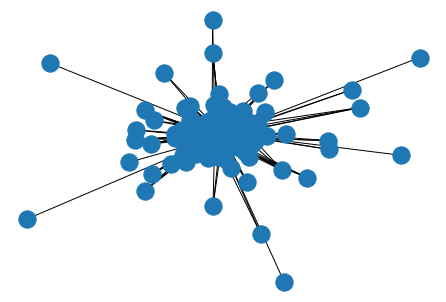

In [ ]:
nx.draw(pescado_no_dirigido)
plt.show()

Una vez construido el grafo obtendremos la lista de grados ($k$), de $s$ y pesos ($w$).

In [121]:
def a_i_j(G:nx.Graph, i:str, j:str) -> float:
  if G.has_edge(i, j): return G[i][j]['weight']
  else: return 0.0

degrees = [val for (node, val) in pescado_no_dirigido.degree()]
s = [P(pescado_no_dirigido, node, a_i_j) for node in pescado_no_dirigido.nodes()]
w = [pescado_no_dirigido[i][j]['weight'] for i, j in pescado_no_dirigido.edges()]

### Grados

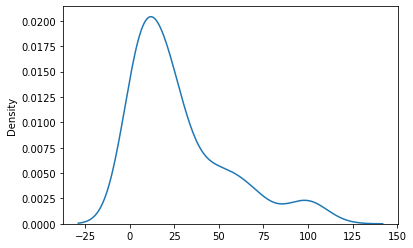

In [147]:
sns.kdeplot(x=degrees, log_scale=(False, False))

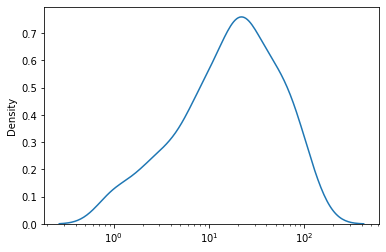

In [ ]:
sns.kdeplot(x=degrees, log_scale=(True, None))

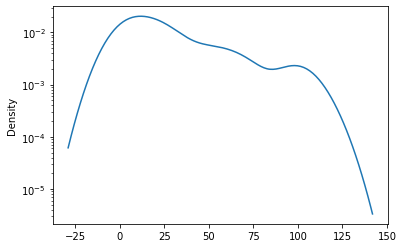

In [ ]:
sns.kdeplot(x=degrees, log_scale=(None, True))

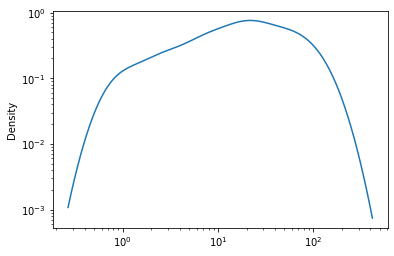

In [ ]:
sns.kdeplot(x=degrees, log_scale=(True, True))

Para el caso de la distribución de grados a priori parece ser una red libre de escala, sin embargo, al transformar los datos para tener un gráfico log v/s log no es posible identificar este comportamiento.

### S

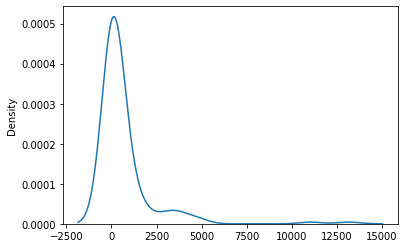

In [148]:
sns.kdeplot(x=s, log_scale=(False, False))

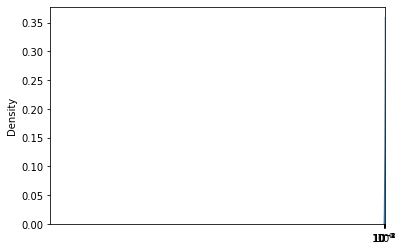

In [138]:
sns.kdeplot(x=s, log_scale=(True, None))

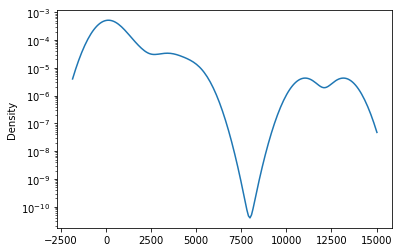

In [125]:
sns.kdeplot(x=s, log_scale=(None, True))

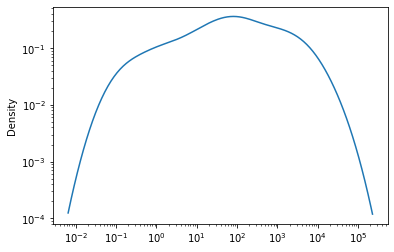

In [145]:
sns.kdeplot(x=s, log_scale=(True, True))

A transformar las escalas a logaritmica se logra apreciar esta vez como tiene un comportamiento de ley de potencia. Esto tiene sentido ya que en el caso con arcos $S_{in}$ sigue una ley de potencia y $S_{out}$ si bien no lo es tiende a una. Finalmente se concluye que al romper la barrera de importación y exportación se acrecenta la notoriedad de una ley de potencia.

### Peso

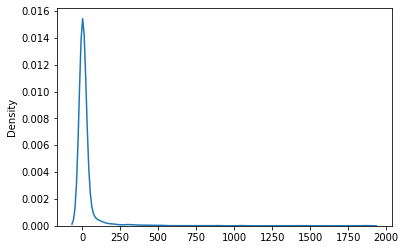

In [149]:
sns.kdeplot(x=w, log_scale=(False, False))

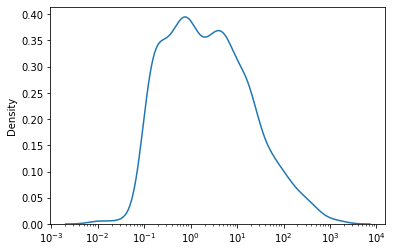

In [150]:
sns.kdeplot(x=w, log_scale=(True, None))

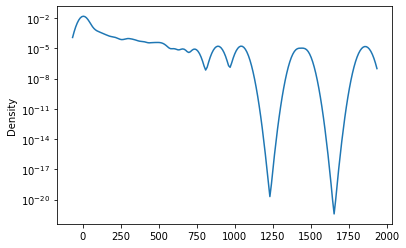

In [151]:
sns.kdeplot(x=w, log_scale=(None, True))

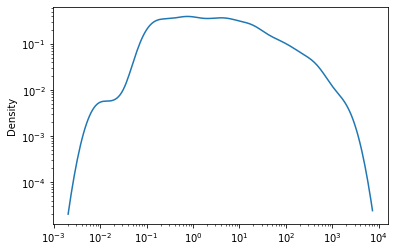

In [152]:
sns.kdeplot(x=w, log_scale=(True, True))

Nuevamente se puede apreciar una ley de potencia, esta vez es mucho más clara, ya que, desde x igual 0 se aprecia como desciende la probabilidad de obtener valores grandes.

## F

In [187]:
nx.dispersion(pescado_no_dirigido)

{'Albania': {'Greece': 0.0, 'Italy': 0.0},
 'Algeria': {'France,Monac': 0.0,
  'Italy': 0.0,
  'Mauritania': 0.0,
  'Spain': 0.0},
 'Angola': {'Brazil': 0.0,
  'China': 0.0,
  'Italy': 0.0,
  'Japan': 0.0,
  'Morocco': 0.0,
  'Netherlands': 0.0,
  'Nigeria': 0.0,
  'Norway': 0.0,
  'Philippines': 0.0,
  'Portugal': 0.0,
  'South Africa': 0.0,
  'Spain': 0.0,
  'Thailand': 0.0,
  'UK': 0.0},
 'Argentina': {'Australia': 0.0,
  'Belgium-Lux': 0.0,
  'Bolivia': 0.0,
  'Brazil': 0.0,
  'Bulgaria': 0.0,
  'Canada': 0.02040816326530612,
  'Chile': 0.0,
  'China': 0.0,
  'China HK SAR': 0.0,
  'Costa Rica': 0.0,
  'Cuba': 0.0,
  'Czech Rep': 0.0,
  'Denmark': 0.0,
  'Dominican Rp': 0.0,
  'Ecuador': 0.0,
  'Egypt': 0.0,
  'Estonia': 0.0,
  'France,Monac': 0.0,
  'Germany': 0.0,
  'Greece': 0.0,
  'Hungary': 0.0,
  'Iceland': 0.0,
  'Israel': 0.0,
  'Italy': 0.0,
  'Japan': 0.0,
  'Jordan': 0.0,
  'Korea Rep.': 0.0,
  'Lebanon': 0.0,
  'Lithuania': 0.0,
  'Malaysia': 0.0,
  'Malta': 0.0,
  'Mex

## G

In [161]:
nx.clustering(pescado_no_dirigido, weight='weight')

{'Albania': 0.005286552311657848,
 'Algeria': 0.0029927046897256144,
 'Angola': 0.0022483351766530543,
 'Argentina': 0.002847631639527635,
 'Armenia': 0.0011795385527210193,
 'Australia': 0.004017501333547874,
 'Austria': 0.0019570468750056452,
 'Azerbaijan': 0.0009247138147896471,
 'Bahamas': 0.0035760550267496354,
 'Bahrain': 0.0008706910928867062,
 'Bangladesh': 0.007555492766600244,
 'Barbados': 0.0023121874069338875,
 'Belarus': 0.002354003316788828,
 'Belgium-Lux': 0.002987582284555725,
 'Belize': 0.0062558789492911495,
 'Benin': 0.00215122788014525,
 'Bermuda': 0.0068595869987161965,
 'Bolivia': 0.0011298280308070095,
 'Bosnia Herzg': 0.0006884121263655206,
 'Brazil': 0.004519423441954545,
 'Bulgaria': 0.001034840107584718,
 'Burkina Faso': 0,
 'Cambodia': 0.003272592639645787,
 'Cameroon': 0.0025715178590727476,
 'Canada': 0.004734341423576564,
 'Chad': 0,
 'Chile': 0.0036899213245172057,
 'China': 0.0053672597402998875,
 'China HK SAR': 0.0036439964930010194,
 'Colombia': 0.00

In [166]:
pescado2 = nx.DiGraph()
for i, j in pescado.edges():
  pescado2.add_edge(i, j, weight=pescado[i][j][0]['weight'])
nx.clustering(pescado2, weight='weight')

{'Albania': 0.0026966892663420447,
 'Algeria': 0.002122280909619391,
 'Angola': 0.0014926177761631337,
 'Argentina': 0.001633914020969015,
 'Armenia': 0.0009358164323172748,
 'Australia': 0.002584360659923824,
 'Austria': 0.001124529325017224,
 'Azerbaijan': 0.0006250325603120918,
 'Bahamas': 0.0026918417329662068,
 'Bahrain': 0.0004908404044003513,
 'Bangladesh': 0.005007797177720486,
 'Barbados': 0.0017673128158051735,
 'Belarus': 0.0014800446662639266,
 'Belgium-Lux': 0.002118713695460351,
 'Belize': 0.00451382663102407,
 'Benin': 0.0015673717220611686,
 'Bermuda': 0.004380748868197586,
 'Bolivia': 0.000769637583284326,
 'Bosnia Herzg': 0.0004812341455449275,
 'Brazil': 0.002487967326029054,
 'Bulgaria': 0.0007894475500606228,
 'Burkina Faso': 0,
 'Cambodia': 0.0023779433317594554,
 'Cameroon': 0.0018648168248719388,
 'Canada': 0.0029233538790100415,
 'Chad': 0,
 'Chile': 0.0021889797383274987,
 'China': 0.00362425076818601,
 'China HK SAR': 0.0024672422299544684,
 'Colombia': 0.002

#Pregunta 3

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

En esta pregunta, vamos a asumir que los datos, provenientes del censo de diferentes localidades de EEUU, siguen una ley de potencia. Para ello, vamos a utilizar tres métodos: Escala Log/Log, Bining, y distribución acumulado. Para esto, debemos calcular la pendiente y el R. Luego de esto, compararemos los tres métodos y compararemos su semejanza con los datos reales.

In [ ]:
#Cargamos el archivo de los datos del enunciado
file = open("cities.txt", "r")
values = dict()
for line in file:
    digit = float(line.strip())    
    if digit not in values.keys():
        values[digit] = 0.0
    values[digit] += 1
file.close()
values=sorted(list(values.items()),key=lambda x:x[0])
datos=[[],[]]
for x,y in values:
  datos[0].append(x)
  datos[1].append(y)

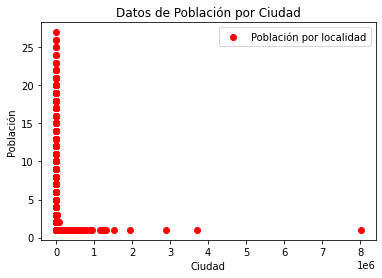

In [ ]:
#revisamos los datos en un histograma
plt.scatter(datos[0],datos[1],color="red",label="Población por localidad")
plt.title("Datos de Población por Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.legend()
plt.show()

## 1. Pendiente Log/Log

En esta sección, calcularemos la pendiente y el R mediante el método Log/Log. Para esto, vamos a crear intervalos en los datos (elegimos 180 por los resultados que hemos obtenidos en las multiples simulaciones realizando la tarea), y graficaremos los datos obtenidos (agrupados en dichos intervalos) junto con la recta formada por la pendiente y el R obtenido.

Pendiente: -1.6857383977757296
R: 23.959326660928078


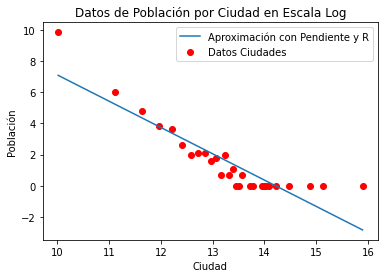

In [ ]:
intervalo= np.linspace(datos[0][0],datos[0][-1]+1,180)#Creamos los intervalos
X_Log = np.zeros(len(intervalo))
Y_Log = np.zeros(len(intervalo))
contador = 1
for x in range(len(datos[1])):
    # Aca vamos avanzando entre los datos, agrupando según el intervalo en el que les corresponde. Aprovechamos que anteriormente ordenamos la data para movernos de intervalo
    aux_x = datos[0][x]
    aux_y = datos[1][x]    
    if aux_x < intervalo[contador] and aux_x >= intervalo[contador-1]:#Verificamos que el valor este en este intervalo y guardamos
      Y_Log[contador-1]+=aux_y
      X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
    else: #Si no corresponde al intervalo, se avanza hasta llegar al intervalo correspondiente                  
      bolean=False
      while bolean==False:
        contador+=1        
        if aux_x < intervalo[contador]:#Se verifica si se entro al intervalo
          Y_Log[contador-1]+=aux_y
          X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
          bolean=True #Se sale del ciclo por que se encontró el intervalo
            
X_aux=[]
Y_aux=[]
total_suma=0#Esto nos servirá en el método acumulado
#Debido a que haremos la escala Log, debemos eliminar los intervalos que esten vacios para luego hacer la transformación a Log/Log
for i in range(len(Y_Log)):
  if Y_Log[i]!=0:
    Y_aux.append(Y_Log[i])
    total_suma+=Y_Log[i]
    X_aux.append(X_Log[i])

#Pasamos a escala Log/Log
X_Log=np.log(X_aux)
Y_Log=np.log(Y_aux)

pendiente1,r1=np.polyfit(X_Log,Y_Log,1)#Calculamos la pendiente y el R
print("Pendiente:",pendiente1)
print("R:",r1)
plt.plot(X_Log,X_Log*pendiente1+r1,label="Aproximación con Pendiente y R")
plt.scatter(X_Log,Y_Log,color="red",label="Datos Ciudades")
plt.title("Datos de Población por Ciudad en Escala Log")
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.legend()
plt.show()

Asumiendo que los datos siguen una ley de potencia, utilizando el método Log/Log, se obtiene una pendiente de -1,6857 y un $R$ de 23.9593 . A partir del gráfico, podemos notar que en la parte media de la recta hay muchos valores debajo de esta. Creemos que esto sucede debido a que el primer valor del gráfico es múy alto ya que, como  hay muchos valores en los primeros intervalos de los datos debido a que los intervalos son equiespaciados y esto entorpece al calculo de ambos valores.


## 1.2 Bining

Al igual que en la sección anterior, intentaremos calcularemos la pendiente y el R, pero esta vez mediante el método Bining. Para esto, vamos a crear intervalos en los datos exponenciales de base 2, y graficaremos los datos obtenidos (agrupados en dichos intervalos) junto con la recta formada por la pendiente y el R obtenido. Cabe mencionar, que dado que en las primeros datos en X hay valores muy altos, los intervalos comenzarán desde un punto mayor, en otras palabras, si el intervalo inicialmente era $[0 , 800000]$, se comenzará una potencia de dos mayor para que no entorpesca a la predicción de la pendiente y el R. Lamentablemente, esto último nos obliga a utilizar menos datos para esta labor.

Pendiente: -1.4152139179855303
R: 21.93912320744284


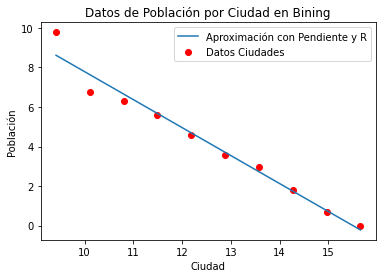

In [ ]:
#Metodo bining de base 2
intervalo=[]
i=12#Elegimos partir desde 2^12 producto que en las diferentes simulaciones que hicimos de la tarea, con este valor obtuvimos mejores resultados
while 2**i < datos[0][-1]:  
  i+=1
  intervalo.append(2**i)#creamos el intervalo
    
X_Log = np.zeros(len(intervalo))
Y_Log = np.zeros(len(intervalo))
contador = 1
for x in range(len(datos[1])):
    aux_x = datos[0][x]
    aux_y = datos[1][x]    
    if aux_x < intervalo[contador] :#Verificamos que el valor este en este intervalo y guardamos      
        Y_Log[contador-1]+=aux_y
        X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
    else:              
      bolean=False
      while bolean==False:
        contador+=1                      
        if aux_x < intervalo[contador] :#Se verifica si se entro al intervalo
          Y_Log[contador-1]+=aux_y
          X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
          bolean=True #Se sale del ciclo por que se encontró el intervalo           
X_aux=[]
Y_aux=[]
for i in range(len(Y_Log)):#Se eliminan los intervalos de X que no tengan valores para no entorpecer la predicción
  if Y_Log[i]!=0:
    Y_aux.append(Y_Log[i])
    X_aux.append(X_Log[i])

X_Log=np.log(X_aux)#Pasamos los datos a escala log
Y_Log=np.log(Y_aux)
pendiente2,r2=np.polyfit(X_Log,Y_Log,1)
print("Pendiente:",pendiente2)
print("R:",r2)
plt.plot(X_Log,X_Log*pendiente2+r2,label="Aproximación con Pendiente y R")
plt.scatter(X_Log,Y_Log,color="red",label="Datos Ciudades")
plt.title("Datos de Población por Ciudad en Bining")
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.legend()
plt.show()

Asumiendo que los datos siguen una ley de potencia, calculando mediante el metodo Bining, se obtiene una pendiente de -1,4152 y un $R$ de 21.9391. Podemos percatarnos que, a diferencia del primer gráfico, aca los valores estan bastante cercanos a la recta. La única desventaja, es que la cantidad de datos a disminuido mucho debido a que los intervalos ahora son exponenciales, por lo mismo, no podemos asegurar con tanto enfasis la predicción.

## 1.3 Distribución Acumulada




En esta última sección, calcularemos la pendiente y el R mediante la distribución acumulada. Para esto, vamos a crear intervalos en los datos (elegimos 180 por los resultados que hemos obtenidos en las multiples simulaciones realizando la tarea), y graficaremos los datos obtenidos (agrupados en dichos intervalos) junto con la recta formada por la pendiente y el R obtenido.

Pendiente: -1.5859438551651852
R: 24.292164664327643


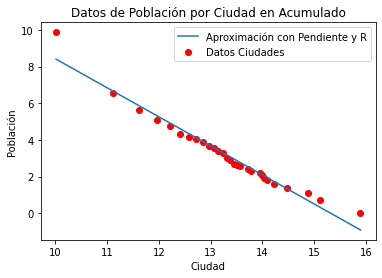

In [ ]:
intervalo= np.linspace(datos[0][0],datos[0][-1]+1,180)#Creamos los intervalos equiespaciados
X_Log = np.zeros(len(intervalo))
Y_Log = np.zeros(len(intervalo))
contador = 1
for x in range(len(datos[1])):
    aux_x = datos[0][x]
    aux_y = datos[1][x]    
    if aux_x < intervalo[contador] and intervalo[contador-1] <= aux_x: #Verificamos que el valor este en este intervalo y guardamos     
        Y_Log[contador-1]+=aux_y
        X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
    else:                        
      bolean=False
      while bolean==False:
        contador+=1        
        if aux_x < intervalo[contador]:#Se verifica si se entro al intervalo
          Y_Log[contador-1]+=aux_y
          X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
          bolean=True #Se sale del ciclo por que se encontró el intervalo 

X_aux=[]
Y_aux=[]
#En este método, tomamos el valor acumulado (la suma de todos los valores) y le vamos restando la suma de ese intervalo
for i in range(len(Y_Log)):#Eliminamos los datos que sean 0
  if Y_Log[i]!=0:    
    Y_aux.append(total_suma)#ponemos el valor que lleva el total en este intervalo
    total_suma-=Y_Log[i]#le restamos al total la cantidad de valores que tenemos en este intervalo
    X_aux.append(X_Log[i])

X_Log=np.log(X_aux)#pasamos a escala Log
Y_Log=np.log(Y_aux)
pendiente3,r3=np.polyfit(X_Log,Y_Log,1)
print("Pendiente:",pendiente3)
print("R:",r3)
plt.plot(X_Log,X_Log*pendiente3+r3,label="Aproximación con Pendiente y R")
plt.scatter(X_Log,Y_Log,color="red",label="Datos Ciudades")
plt.title("Datos de Población por Ciudad en Acumulado")
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.legend()
plt.show()

Asumiendo que los datos siguen una ley de potencia, realizandolo mediante la distribución acumulada, se obtiene una pendiente de -1,5859 y un $R$ de 24.2921 . Podemos notar, que a diferencia del segundo método, aca se están considerando muchos más datos que con bining. Por otro lado, a diferencia del primer método, en esta recta solamente el primer valor está bastante alejado de la recta. 

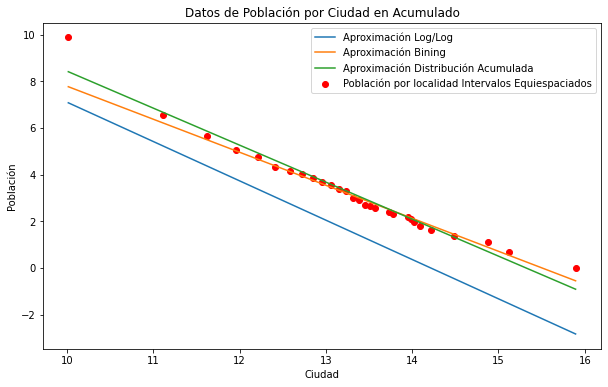

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(X_Log,X_Log*pendiente1+r1,label="Aproximación Log/Log")
plt.plot(X_Log,X_Log*pendiente2+r2,label="Aproximación Bining")
plt.plot(X_Log,X_Log*pendiente3+r3,label="Aproximación Distribución Acumulada")
plt.scatter(X_Log,Y_Log,color="red",label="Población por localidad Intervalos Equiespaciados")
plt.title("Datos de Población por Ciudad en Acumulado")
plt.xlabel("Ciudad")
plt.ylabel("Población")
plt.legend()
plt.show()

A partir de los datos, podemos concluir que el método de distribuición acumulada lográ crear una mejor representación de los datos. Creemos que esto sucede principalmente por la que el método Bining debe eliminar muchos datos para poder funcionar en este caso, y el modelo log/log es muy sencible a que el primer valor (los primeros intervalos) contienen una gran cantidad de valores y entorpece a la predicción de la pendiente y el $R$.

# Pregunta 4


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

En esta pregunta, analizaremos el comportamiento de una "avalancha" bajo dos tipos de redes. Posterior, compararemos a que tipo de distribución son semenjantes prediciendo sus valores.

In [ ]:
#Primero generamos las variables de las condiciones pedidas por enunciado
n=1000
p=float(2/n)
m=1
Grafo1=nx.erdos_renyi_graph(n,p)#Generamos los grafos aleatorios
Grafo2=nx.barabasi_albert_graph(n,m)

In [ ]:
#Funciones auxiliares

#Esta funcion reparte los granos que se rebalsaron y agrega a una cola de tareas los vecinos que tambien se rebalsaron
def repartir_granos(G,baldes,pendientes,tam):
  for i in list(G.neighbors(pendientes[0])):#reparte granos por cada vecino
    if np.random.randint(0,1001) > 1:#verifica la probabilidad de perdida del grano
      if baldes[i]>len(list(G.neighbors(i))):#revisa si el vecino se rebalsa      
          tam+=1
          pendientes.append(i)#lo agrega a pendientes por repartir
      else:
        baldes[i]+=1
      baldes[pendientes[0]]-=1    
  pendientes.pop(0)
  return pendientes,baldes,tam

#Esta funcion simula una iteracion del experimento
def iteracion(G,baldes,n):
  tam=0
  nodo_random=np.random.randint(0,n)#seleccionamos un nodo random al que agregarle un grano
  if baldes[nodo_random]>len(list(G.neighbors(nodo_random))):#revisamos si se rebalsa    
    pila=[nodo_random] #lo agregamos a la pila de tareas           
    tam+=1
    while len(pila)!=0:#iteramos por cada nodo al que falte repartirle sus granos                  
      pila,baldes,tam=repartir_granos(G,baldes,pila,tam)#repartimos sus granos            
  else:
    baldes[nodo_random]+=1
  return baldes,tam

#Esta funcion simula el experimento
def experimento(G,n):
  baldes=np.zeros(n)#aca guardaremos cuantos granos tienen los nodos
  avalanchas={}#para la distribucion de avalanchas
  for i in G.nodes():
    baldes[i]=np.random.randint(0,len(list(G.neighbors(i)))+1)#hacemos un random de la cantidad de granos inicial
  for i in range(0,10000):#simulamos durante 10000 rondas
    baldes,tam=iteracion(G,baldes,n)
    if tam in avalanchas.keys():#guardamos el tamaño de la avalancha en la distribucion
      avalanchas[tam]+=1
    else:
      avalanchas[tam]=1
  return avalanchas
  

In [ ]:
#Arreglamos los datos de los diccionarios para poder hacer los graficos
avalanchas1=experimento(Grafo1,n)
avalanchas2=experimento(Grafo2,n)
values=sorted(list(avalanchas1.items()),key=lambda x:x[0])
datos1=[[],[]]
for x,y in values:
  datos1[0].append(x)
  datos1[1].append(y)

values=sorted(list(avalanchas2.items()),key=lambda x:x[0])
datos2=[[],[]]
for x,y in values:
  datos2[0].append(x)
  datos2[1].append(y)

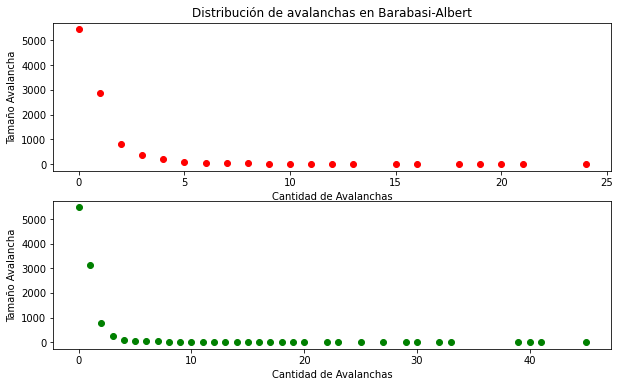

<Figure size 1080x720 with 0 Axes>

In [ ]:
f, axarr = plt.subplots(2, 1)
f.set_figheight(6)
f.set_figwidth(10)
axarr[0].scatter(datos1[0],datos1[1],color="red")
axarr[1].scatter(datos2[0],datos2[1],color="green")
axarr[0].set_xlabel('Cantidad de Avalanchas')
axarr[0].set_ylabel('Tamaño Avalancha')
axarr[1].set_xlabel('Cantidad de Avalanchas')
axarr[1].set_ylabel('Tamaño Avalancha')
axarr[0].set_title("Distribución de avalanchas en Erdos-Renyi")
axarr[0].set_title("Distribución de avalanchas en Barabasi-Albert")
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.show()

De lo que podemos observar de las gráficas de las distribuciones de las avalanchas en cada una de las redes, es que estas podrían seguir una ley de potencia. Procederemos a calcular los valores de la pendiente y de $R$ para cada dataset.

Pendiente: -2.3742755714488215
R: 9.301603238585441


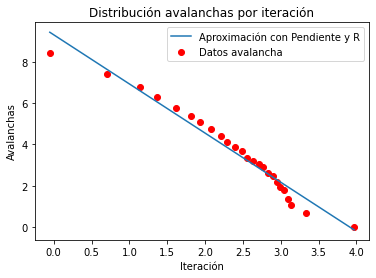

In [ ]:
#Para la distribución de avalanchas en erdos-renyi
intervalo= np.linspace(datos1[0][0],datos1[0][-1]+1,200)
X_Log = np.zeros(len(intervalo))
Y_Log = np.zeros(len(intervalo))
contador = 1
for x in range(len(datos1[1])):#Agrupamos los valores por intervalos
    aux_x = datos1[0][x]
    aux_y = datos1[1][x]    
    if aux_x < intervalo[contador]:#verificamos que este en el intervalo correcto
      Y_Log[contador-1]+=aux_y
      X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
    else:                  
      bolean=False
      while bolean==False:
        contador+=1        
        if aux_x < intervalo[contador]:
          Y_Log[contador-1]+=aux_y
          X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
          bolean=True
            
X_aux=[]
Y_aux=[]
total_suma=0
for i in range(len(Y_Log)):#eliminamos los intervalos sin valores
  if Y_Log[i]!=0:
    Y_aux.append(Y_Log[i])
    total_suma+=Y_Log[i]
    X_aux.append(X_Log[i])

for i in range(len(Y_aux)):#hacemos lo mismo que para la distribución acumulada
    aux=Y_aux[i]
    Y_aux[i]=total_suma
    total_suma-=aux    
    
X_Log=np.log(X_aux[1:])
Y_Log=np.log(Y_aux[1:])
pendiente,r=np.polyfit(X_Log,Y_Log,1)
print("Pendiente:",pendiente)
print("R:",r)
plt.plot(X_Log,X_Log*pendiente+r,label="Aproximación con Pendiente y R")
plt.scatter(X_Log,Y_Log,color="red",label="Datos avalancha")
plt.title("Distribución avalanchas por iteración")
plt.xlabel("Iteración")
plt.ylabel("Avalanchas")
plt.legend()
plt.show()



En base a lo obtenido, podemos observar que para la red Erdos-Renyi, los valores de los cofiencientes de la distribución de avalanchas es: la pendiente es -2,3742 y $R$ es igual a 9,3016 para la distribución de avalanchas. Cabe mencionar que eliminamos el primer intervalo para la predicción de los coeficientes ya que era mucho más grande que el siguiente valor, por lo mismo, el valor de la pendiente y el $R$ eran diferentes, alejando mucho la recta resultante del resto de los valores.

Pendiente: -2.172816283736756
R: 9.124199849477378


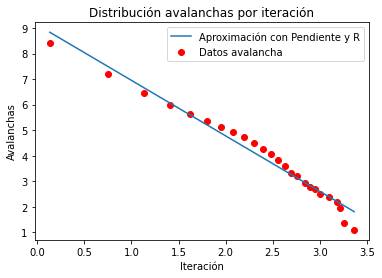

In [ ]:
#Para la distribución de avalanchas en barabasi-albert
intervalo= np.linspace(datos2[0][0],datos2[0][-1]+1,200)
X_Log = np.zeros(len(intervalo))
Y_Log = np.zeros(len(intervalo))
contador = 1
for x in range(len(datos1[1])):
    aux_x = datos2[0][x]
    aux_y = datos2[1][x]    
    if aux_x < intervalo[contador]:
      Y_Log[contador-1]+=aux_y
      X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
    else:                  
      bolean=False
      while bolean==False:
        contador+=1        
        if aux_x < intervalo[contador]:
          Y_Log[contador-1]+=aux_y
          X_Log[contador-1]=float((intervalo[contador]+intervalo[contador-1])/2)
          bolean=True
            
X_aux=[]
Y_aux=[]
total_suma=0
for i in range(len(Y_Log)):#eliminamos los intervalos sin valores
  if Y_Log[i]!=0:
    Y_aux.append(Y_Log[i])
    total_suma+=Y_Log[i]
    X_aux.append(X_Log[i])

for i in range(len(Y_aux)):#hacemos lo mismo que para la distribución acumulada
    aux=Y_aux[i]
    Y_aux[i]=total_suma
    total_suma-=aux    
    
X_Log=np.log(X_aux[1:])
Y_Log=np.log(Y_aux[1:])
pendiente,r=np.polyfit(X_Log,Y_Log,1)
print("Pendiente:",pendiente)
print("R:",r)
plt.plot(X_Log,X_Log*pendiente+r,label="Aproximación con Pendiente y R")
plt.scatter(X_Log,Y_Log,color="red",label="Datos avalancha")
plt.title("Distribución avalanchas por iteración")
plt.xlabel("Iteración")
plt.ylabel("Avalanchas")
plt.legend()
plt.show()

En base a lo obtenido, podemos observar que para la red Barabasi-Albert, los valores de los cofiencientes de la distribución de avalanchas es: la pendiente es -2,1728 y $R$ es igual a 9,1241 para la distribución de avalanchas. Cabe mencionar que eliminamos el primer intervalo para la predicción de los coeficientes ya que era mucho más grande que el siguiente valor, por lo mismo, el valor de la pendiente y el $R$ eran diferentes, alejando mucho la recta resultante del resto de los valores.

Como comentario, podemos notar que, pese a que las dos redes son diferentes, sus distribuciones de avalanchas (que siguen una ley de potencia) poseen coeficientes muy similares entre sí.

#Pregunta 5

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

En esta pregunta, realizaremos la simulación del comportamiento de una enfermedad frente al uso de diferentes estrategias para frenarla.

In [ ]:
#Primero generamos las variables de las condiciones pedidas por enunciado
n=10000
p=float(4/n)
m=2

In [ ]:
#Funciones auxiliares
#Esta funcion simula una ronda de la Enfermedad
def simular_ronda(G,estados,turnos):  
  contador=0 # contador de los contagiados esta ronda
  for i in G.nodes(): #Actualizamos todos los nodos
    if estados[i]==0:#Verificamos que aun no este ni infectado ni recuperado      
      prob=np.random.random()#obtenemos la probabilidad de 0.2 pedida por enunciado
      if prob <= 0.2:        
        for j in list(G.neighbors(i)):#Revisamos los vecinos de este nodo
          if estados[j]==1: #verificamos si tiene un vecino infectado                        
              estados[i]=1#pasamos el estado del nodo a infectado
              contador+=1
              break
    elif estados[i]==1:#actualizamos la cantidad de turnos como infectado que lleva cada nodo
      contador+=1
      turnos[i]+=1  
      if turnos[i]==8:#Como lleva 8 iteraciones como infectado se actualiza a R
        estados[i]=2    
  return estados, turnos,contador

#Esta funcion simula la estrategia 0
def simulacion_estrategia0(G,n):
  turnos=np.zeros(n)# aca almacenamos los turnos que llevan enfermos
  estados=np.zeros(n)# aca almacenamos el estado de cada nodo
  historico=[1]#sabemos que inicialmente era un solo infectado
  infectado=np.random.randint(0,n)#infectado al azar inicial
  estados[infectado]=1# guardamos el infectado  
  while historico[-1]!=0: #no hacemos nada y simulamos las rondas
    estados,turnos,contador=simular_ronda(G,estados,turnos)#simulamos ronda
    historico.append(contador)
  contador=0
  for i in range(0,n):# hacemos el conteo final de todos los que se infectaron en algun mommento
    if estados[i]==2:
      contador+=1
  return historico,contador

#Esta funcion simula la estrategia 1
def simulacion_estrategia1(G,n):
  turnos=np.zeros(n)
  estados=np.zeros(n)
  historico=[1]
  infectado=np.random.randint(0,n)#infectado al azar inicial
  estados[infectado]=1# guardamos el infectado  
  vacunados=0
  while vacunados<500:#Como es la estrategia 1, vacunamos a 500 personas al azar
      vacuna=np.random.randint(0,n)
      if vacuna!=infectado and estados[vacuna]!=2:#Verificamos que no estemos vacunando a alguien a vacunado o infectado
        estados[vacuna]=2
        vacunados+=1            
  while historico[-1]!=0:#simulamos
    estados,turnos,contador=simular_ronda(G,estados,turnos)#simulamos ronda
    historico.append(contador)
  contador=-500
  for i in range(0,n):
    if estados[i]==2:
      contador+=1
  return historico,contador

#Esta funcion simula la estrategia 2
def simulacion_estrategia2(G,n):
  turnos=np.zeros(n)
  estados=np.zeros(n)
  historico=[1]
  infectado=np.random.randint(0,n)#infectado al azar inicial
  estados[infectado]=1# guardamos el infectado  
  vacunados=0
  vip=list(G.degree())
  vip=sorted(vip, key=lambda x: x[1])#ordenamos por los de mayor # vecinos
  pos=-1
  while vacunados<500:      
      if vip[pos][0]!=infectado:#vamos vacunando a los de mayor numero de vecinos        
        estados[vip[pos][0]]=2        
        vacunados+=1         
      pos-=1
  while historico[-1]!=0:#simulamos
    estados,turnos,contador=simular_ronda(G,estados,turnos)#simulamos ronda
    historico.append(contador)
  contador=-500
  for i in range(0,n):
    if estados[i]==2:
      contador+=1
  return historico,contador

#esta funcion simula la estrategia 3
def simulacion_estrategia3(G,n):
  turnos=np.zeros(n)
  estados=np.zeros(n)
  historico=[1]
  infectado=np.random.randint(0,n)#infectado al azar inicial
  estados[infectado]=1# guardamos el infectado  
  vacunados=0  
  while vacunados<500:#Vacunamos a nodos al azar y a sus vecinos con 500 vacunas
      vacuna=np.random.randint(0,n)
      if vacuna!=infectado and estados[vacuna]!=2:
        estados[vacuna]=2        
        vacunados+=1     
        for i in list(G.neighbors(vacuna)):#vacunamos a cada uno de los vecinos hasta llegar a las 500 vacunas
          if vacunados==500:
            break
          if estados[i]!=2 and i!=infectado:
            estados[i]=2        
            vacunados+=1
  while historico[-1]!=0:#simulamos
    estados,turnos,contador=simular_ronda(G,estados,turnos)#simulamos ronda
    historico.append(contador)
  contador=-500
  for i in range(0,n):
    if estados[i]==2:
      contador+=1
  return historico,contador

In [ ]:
#En estos cuatro arreglos guardaremos los ejemplos para cada estrategia en el grafo erdos-renyi
resultados1_1=[]
resultados1_2=[]
resultados1_3=[]
resultados1_4=[]
infectados1=[0,0,0,0]
promedios1=[0,0,0,0]
simulaciones=20 # numero de simulaciones
for i in range(0,simulaciones):
  Grafo1=nx.erdos_renyi_graph(n,p)
  aux1,aux2=simulacion_estrategia0(Grafo1,n)#Estrategia 0  
  resultados1_1.append(aux1)
  infectados1[0]+=aux2
  promedios1[0]+=len(aux1)
  aux1,aux2=simulacion_estrategia1(Grafo1,n)  #Estrategia 1
  resultados1_2.append(aux1)
  infectados1[1]+=aux2
  promedios1[1]+=len(aux1)
  aux1,aux2=simulacion_estrategia2(Grafo1,n)  #Estrategia 2
  resultados1_3.append(aux1)
  infectados1[2]+=aux2
  promedios1[2]+=len(aux1)
  aux1,aux2=simulacion_estrategia3(Grafo1,n)  #Estrategia 3
  resultados1_4.append(aux1)
  infectados1[3]+=aux2
  promedios1[3]+=len(aux1)
promedios1[0]=int(promedios1[0]/len(resultados1_1))
promedios1[1]=int(promedios1[1]/len(resultados1_2))
promedios1[2]=int(promedios1[2]/len(resultados1_3))
promedios1[3]=int(promedios1[3]/len(resultados1_4))
infectados1[0]=int(infectados1[0]/len(resultados1_1))
infectados1[1]=int(infectados1[1]/len(resultados1_2))
infectados1[2]=int(infectados1[2]/len(resultados1_3))
infectados1[3]=int(infectados1[3]/len(resultados1_4))

In [ ]:
#En estos cuatro arreglos guardaremos los ejemplos para cada estrategia en el grafo barabasi-albert
resultados2_1=[]
resultados2_2=[]
resultados2_3=[]
resultados2_4=[]
infectados2=[0,0,0,0]
promedios2=[0,0,0,0]
simulaciones=20 # numero de simulaciones
for i in range(0,simulaciones):
  Grafo2=nx.barabasi_albert_graph(n,m)
  aux1,aux2=simulacion_estrategia0(Grafo2,n) #Estrategia 0 
  resultados2_1.append(aux1)
  infectados2[0]+=aux2
  promedios2[0]+=len(aux1)
  aux1,aux2=simulacion_estrategia1(Grafo2,n)  #Estrategia 1
  resultados2_2.append(aux1)
  infectados2[1]+=aux2
  promedios2[1]+=len(aux1)
  aux1,aux2=simulacion_estrategia2(Grafo2,n)  #Estrategia 2
  resultados2_3.append(aux1)
  infectados2[2]+=aux2
  promedios2[2]+=len(aux1)
  aux1,aux2=simulacion_estrategia3(Grafo2,n)  #Estrategia 3
  resultados2_4.append(aux1)
  infectados2[3]+=aux2
  promedios2[3]+=len(aux1)
promedios2[0]=int(promedios2[0]/len(resultados2_1))
promedios2[1]=int(promedios2[1]/len(resultados2_2))
promedios2[2]=int(promedios2[2]/len(resultados2_3))
promedios2[3]=int(promedios2[3]/len(resultados2_4))
infectados2[0]=int(infectados2[0]/len(resultados2_1))
infectados2[1]=int(infectados2[1]/len(resultados2_2))
infectados2[2]=int(infectados2[2]/len(resultados2_3))
infectados2[3]=int(infectados2[3]/len(resultados2_4))

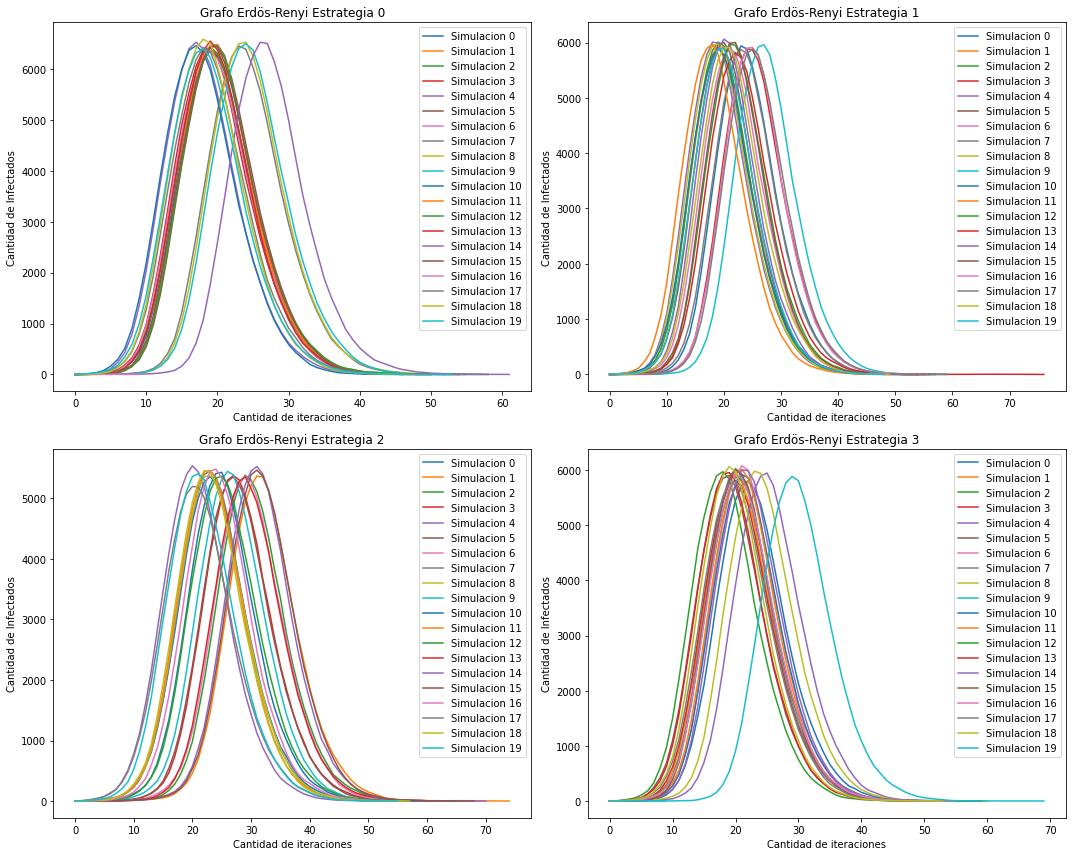

In [ ]:
#Graficamos el comportamiento de las simulaciones para cada una de las estrategias en erdos-renyi

# row and column sharing
f, axarr = plt.subplots(2, 2)
f.set_figheight(12)
f.set_figwidth(15)

axarr[0, 0].set_title("Grafo Erdös-Renyi Estrategia 0")
axarr[0, 0].set_xlabel('Cantidad de iteraciones')
axarr[0, 0].set_ylabel('Cantidad de Infectados')
axarr[0, 1].set_title("Grafo Erdös-Renyi Estrategia 1")
axarr[0, 1].set_xlabel('Cantidad de iteraciones')
axarr[0, 1].set_ylabel('Cantidad de Infectados')
axarr[1, 0].set_title("Grafo Erdös-Renyi Estrategia 2")
axarr[1, 0].set_xlabel('Cantidad de iteraciones')
axarr[1, 0].set_ylabel('Cantidad de Infectados')
axarr[1, 1].set_title("Grafo Erdös-Renyi Estrategia 3")
axarr[1, 1].set_xlabel('Cantidad de iteraciones')
axarr[1, 1].set_ylabel('Cantidad de Infectados')

#Erdos Renyi estrategia 0
for i in range(len(resultados1_1)):  
  x = np.arange(0, len(resultados1_1[i]))
  nombre='Simulacion '+str(i)
  axarr[0, 0].plot(x, resultados1_1[i], label=nombre)

#Erdos Renyi estrategia 1
for i in range(len(resultados1_2)):  
  x = np.arange(0, len(resultados1_2[i]))
  nombre='Simulacion '+str(i)
  axarr[0, 1].plot(x, resultados1_2[i], label=nombre)
                
#Erdos Renyi estrategia 2
for i in range(len(resultados1_3)):  
    x = np.arange(0, len(resultados1_3[i]))
    nombre='Simulacion '+str(i)
    axarr[1, 0].plot(x, resultados1_3[i], label=nombre)

#Erdos Renyi estrategia 3
for i in range(len(resultados1_4)):  
    x = np.arange(0, len(resultados1_4[i]))
    nombre='Simulacion '+str(i)
    axarr[1, 1].plot(x, resultados1_4[i], label=nombre)
                
axarr[0,0].legend()
axarr[0,1].legend()
axarr[1,0].legend()
axarr[1,1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#Aca sacaremos un promedio de las simulaciones en Erdos-renyi de cada estrategia
resultados1=[]
data_aux=[resultados1_1,resultados1_2,resultados1_3,resultados1_4]#juntamos los datos para poder sacar los promedios de cada estrategia
for t in range(0,4):    
    aux=[]
    entraron=0
    flag=False
    for i in range(0,promedios1[t]):    
      value=0
      for j in range(0,len(data_aux[t])):
        if len(data_aux[t][j])>=promedios1[t]:
          if flag == False:
            entraron+=1
          value+=data_aux[t][j][i]
      value=int(value/entraron)
      aux.append(value)
      flag=True
    resultados1.append(aux)

La Enfermedad duro 50 iteraciones en promedio en con la Estrategia 0
La Enfermedad tuvo 8800 infectados totales en promedio en con la Estrategia 0 

La Enfermedad duro 56 iteraciones en promedio en con la Estrategia 1
La Enfermedad tuvo 8720 infectados totales en promedio en con la Estrategia 1 

La Enfermedad duro 61 iteraciones en promedio en con la Estrategia 2
La Enfermedad tuvo 8562 infectados totales en promedio en con la Estrategia 2 

La Enfermedad duro 53 iteraciones en promedio en con la Estrategia 3
La Enfermedad tuvo 8287 infectados en promedio en con la Estrategia 3


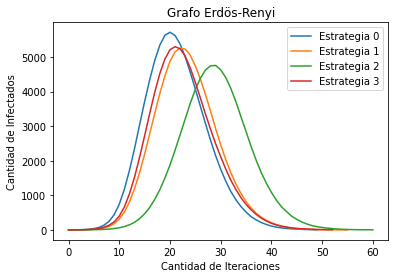

<Figure size 1080x720 with 0 Axes>

In [ ]:
print("La Enfermedad duro",promedios1[0], "iteraciones en promedio en con la Estrategia 0")
print("La Enfermedad tuvo",infectados1[0], "infectados totales en promedio en con la Estrategia 0","\n")
print("La Enfermedad duro",promedios1[1], "iteraciones en promedio en con la Estrategia 1")
print("La Enfermedad tuvo",infectados1[1], "infectados totales en promedio en con la Estrategia 1","\n")
print("La Enfermedad duro",promedios1[2], "iteraciones en promedio en con la Estrategia 2")
print("La Enfermedad tuvo",infectados1[2], "infectados totales en promedio en con la Estrategia 2","\n")
print("La Enfermedad duro",promedios1[3], "iteraciones en promedio en con la Estrategia 3")
print("La Enfermedad tuvo",infectados1[3], "infectados en promedio en con la Estrategia 3")
for i in range(len(resultados1)):  
  x = np.arange(0, len(resultados1[i]))
  nombre='Estrategia '+str(i)
  plt.plot(x, resultados1[i], label=nombre)
plt.xlabel('Cantidad de Iteraciones')
plt.ylabel('Cantidad de Infectados')
plt.title("Grafo Erdös-Renyi")
plt.legend()
plt.figure(figsize=(15,10))
plt.show()

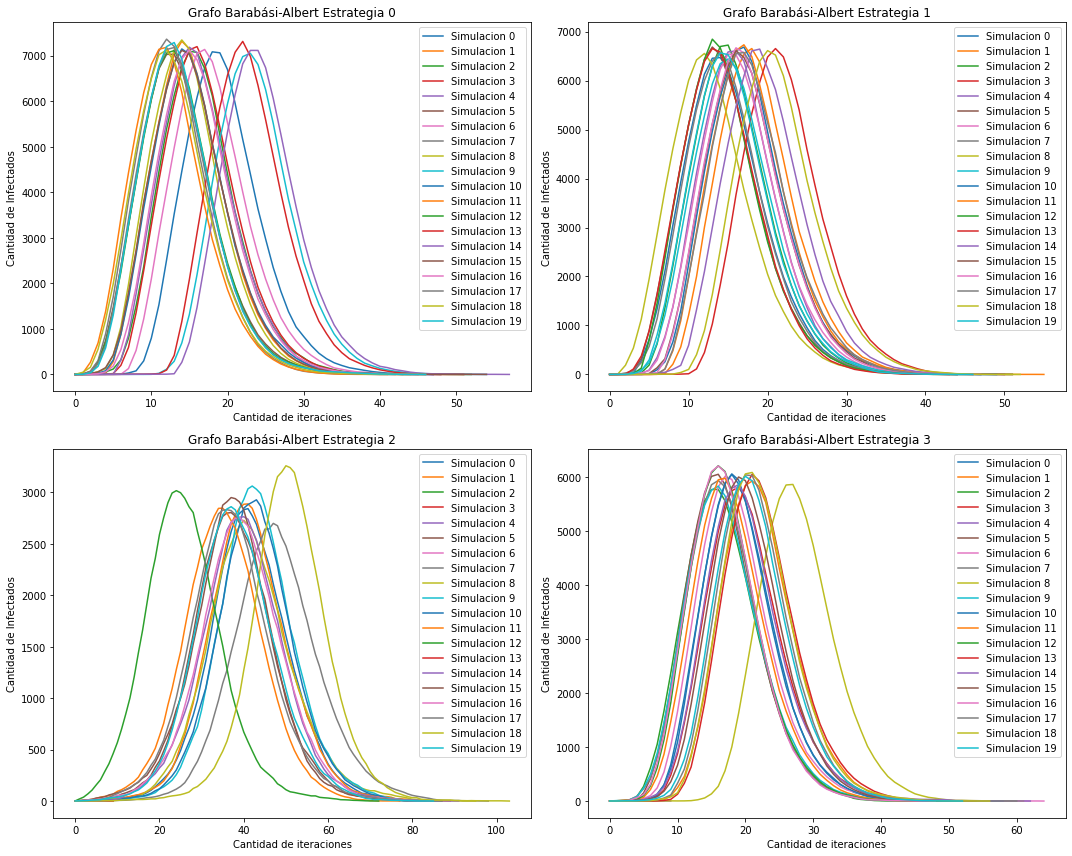

In [ ]:
#Barabasi 
f, axarr = plt.subplots(2, 2)
f.set_figheight(12)
f.set_figwidth(15)

axarr[0, 0].set_title("Grafo Barabási-Albert Estrategia 0")
axarr[0, 0].set_xlabel('Cantidad de iteraciones')
axarr[0, 0].set_ylabel('Cantidad de Infectados')
axarr[0, 1].set_title("Grafo Barabási-Albert Estrategia 1")
axarr[0, 1].set_xlabel('Cantidad de iteraciones')
axarr[0, 1].set_ylabel('Cantidad de Infectados')
axarr[1, 0].set_title("Grafo Barabási-Albert Estrategia 2")
axarr[1, 0].set_xlabel('Cantidad de iteraciones')
axarr[1, 0].set_ylabel('Cantidad de Infectados')
axarr[1, 1].set_title("Grafo Barabási-Albert Estrategia 3")
axarr[1, 1].set_xlabel('Cantidad de iteraciones')
axarr[1, 1].set_ylabel('Cantidad de Infectados')

#Barabasi estrategia 0
for i in range(len(resultados2_1)):  
  x = np.arange(0, len(resultados2_1[i]))
  nombre='Simulacion '+str(i)
  axarr[0, 0].plot(x, resultados2_1[i], label=nombre)


#Barabasi estrategia 1
for i in range(len(resultados2_2)):  
  x = np.arange(0, len(resultados2_2[i]))
  nombre='Simulacion '+str(i)
  axarr[0, 1].plot(x, resultados2_2[i], label=nombre)

#Barabasi estrategia 2
for i in range(len(resultados2_3)):  
  x = np.arange(0, len(resultados2_3[i]))
  nombre='Simulacion '+str(i)
  axarr[1, 0].plot(x, resultados2_3[i], label=nombre)

#Barabasi estrategia 3
for i in range(len(resultados2_4)):  
  x = np.arange(0, len(resultados2_4[i]))
  nombre='Simulacion '+str(i)
  axarr[1, 1].plot(x, resultados2_4[i], label=nombre)

axarr[0,0].legend()
axarr[0,1].legend()
axarr[1,0].legend()
axarr[1,1].legend()
plt.tight_layout()
plt.show()

In [ ]:
#Aca sacaremos un promedio de las simulaciones en Erdos-renyi de cada estrategia
resultados2=[]
data_aux=[resultados2_1,resultados2_2,resultados2_3,resultados2_4]#juntamos los datos para poder sacar los promedios de cada estrategia
for t in range(0,4):    
    aux=[]
    entraron=0
    flag=False
    for i in range(0,promedios2[t]):    
      value=0
      for j in range(0,len(data_aux[t])):
        if len(data_aux[t][j])>=promedios2[t]:
          if flag == False:
            entraron+=1
          value+=data_aux[t][j][i]
      value=int(value/entraron)
      aux.append(value)
      flag=True
    resultados2.append(aux)

La Enfermedad duro 48 iteraciones en promedio en con la Estrategia 0
La Enfermedad tuvo 8800 infectados totales en promedio en con la Estrategia 0 

La Enfermedad duro 48 iteraciones en promedio en con la Estrategia 1
La Enfermedad tuvo 8720 infectados totales en promedio en con la Estrategia 1 

La Enfermedad duro 68 iteraciones en promedio en con la Estrategia 2
La Enfermedad tuvo 8562 infectados totales en promedio en con la Estrategia 2 

La Enfermedad duro 52 iteraciones en promedio en con la Estrategia 3
La Enfermedad tuvo 8287 infectados totales en promedio en con la Estrategia 3


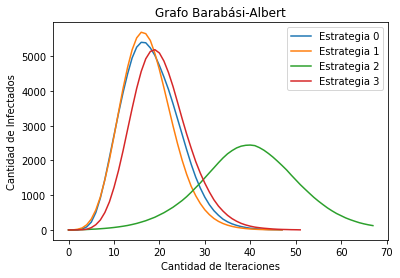

<Figure size 1080x720 with 0 Axes>

In [ ]:
print("La Enfermedad duro",promedios2[0], "iteraciones en promedio en con la Estrategia 0")
print("La Enfermedad tuvo",infectados1[0], "infectados totales en promedio en con la Estrategia 0","\n")
print("La Enfermedad duro",promedios2[1], "iteraciones en promedio en con la Estrategia 1")
print("La Enfermedad tuvo",infectados1[1], "infectados totales en promedio en con la Estrategia 1","\n")
print("La Enfermedad duro",promedios2[2], "iteraciones en promedio en con la Estrategia 2")
print("La Enfermedad tuvo",infectados1[2], "infectados totales en promedio en con la Estrategia 2","\n")
print("La Enfermedad duro",promedios2[3], "iteraciones en promedio en con la Estrategia 3")
print("La Enfermedad tuvo",infectados1[3], "infectados totales en promedio en con la Estrategia 3")
for i in range(len(resultados2)):  
  x = np.arange(0, len(resultados2[i]))
  nombre='Estrategia '+str(i)
  plt.plot(x, resultados2[i], label=nombre)
plt.xlabel('Cantidad de Iteraciones')
plt.ylabel('Cantidad de Infectados')
plt.title("Grafo Barabási-Albert")
plt.legend()
plt.figure(figsize=(15,10))
plt.show()

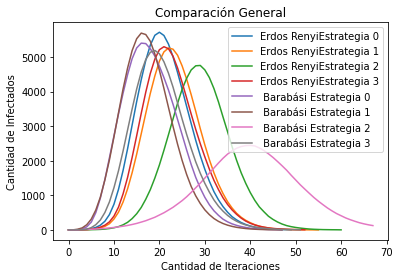

<Figure size 1152x648 with 0 Axes>

In [ ]:
#aca podemos observar en un solo grafico el comportamiento de las diferentes estrategias en ambos tipos de redes
for i in range(len(resultados1)):  
  x = np.arange(0, len(resultados1[i]))
  nombre='Erdos RenyiEstrategia '+str(i)
  plt.plot(x, resultados1[i], label=nombre)

for i in range(len(resultados2)):  
  x = np.arange(0, len(resultados2[i]))
  nombre=' Barabási Estrategia '+str(i)
  plt.plot(x, resultados2[i], label=nombre)

plt.xlabel('Cantidad de Iteraciones')
plt.ylabel('Cantidad de Infectados')
plt.title("Comparación General")
plt.legend()
plt.figure(figsize=(16,9))
plt.savefig('grafica_final.png')
plt.show()

A raiz de los resultados obtenidos, podemos notar que las 4 estrategias son estables en una red Erdos-Renyi. Sin embargo, la estrategia 2 obtiene una pequeña ventaja a las demas debido a que obtiene un menor peak de infectados, teniendo una duración parecida a las demas estrategias.

Por otro lado, en Barabasi-Albert podemos notar cierta variedad en los resultados. En este caso, las estrategias 0,1 y 3 tienen un comportamiento similar en terminos de duración de la enfermedad, pero la estrategia 3 tiene un mejor comportamiento en terminos de peak de infectados dentro de esas estrategias. Sin embargo, la estrategia 2 tiene un comportamiento totalmente diferente al resto. En esta, la duración es mucho mayor a las demás pero su peak es considerablemente menor.

Como conclusión de esto, y de las multiples simulaciones que se realizarón para esta pregunta, se puede inferir que se necesitan aún más simulaciones para obtener un comportamiento estable de cada una de las estrategias en los dos tipos de redes. Aún así, cabe destacar el comportamiento de la la estrategia 2 en la red Barabasi-Albert. Esta estrategia produce un efecto esperado (en estos tiempos de pandemia), donde la gente (en el caso del covid19) se va contagiando de manera pero no alcanza peak tan altos de manera que colapsen los servicios de salud, pero aumenta la duración de la pandemia.
